In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CARGA DEL DATASET

In [ ]:
df = pd.read_csv("train.csv")  

print("\n Primeras filas:")
print(df.head())

print("\n Nulos por columna:")
print(df.isnull().sum())

print("\n Estadísticas numéricas:")
print(df.describe())

In [ ]:
# Mostrar solo las columnas que tienen al menos un valor nulo
nulos = df.isnull().sum()
print(nulos[nulos > 0])


LIMPIEZA BÁSICA : eliminar nulos de columnas clave

In [ ]:
"""
SalePrice : cuánto se vendió la casa.
GrLivArea : cuántos metros o pies cuadrados tiene.
OverallQual : qué tan buena calidad tiene.
Neighborhood : en qué zona está.
"""
cols_clave = [c for c in ["SalePrice", "GrLivArea", "OverallQual", "Neighborhood"] 
              if c in df.columns]
"""
cols_objetivo = ["SalePrice", "GrLivArea", "OverallQual", "Neighborhood"]
cols_clave = []

for c in cols_objetivo:
    if c in df.columns:
        cols_clave.append(c)
"""
df1 = df.dropna(subset=cols_clave)
print(f"\n Dropna en columnas clave {cols_clave} → filas: {len(df)} → {len(df1)}")


FEATURE ENGINEERING BÁSICO: price_per_sqft
Definición: SalePrice / GrLivArea (evitar división por 0)

In [35]:
if "SalePrice" in df1.columns and "GrLivArea" in df1.columns:
    #price_per_sqft: cuánto cuesta cada metro de una casa.
    df1["price_per_sqft"] = df1["SalePrice"] / df1["GrLivArea"].replace(0, np.nan)
    print("\n[2] Columna creada: price_per_sqft")
    print(df1[["SalePrice", "GrLivArea", "price_per_sqft"]].head())
else:
    df1["price_per_sqft"] = np.nan
    print("\n[2] No se pudo crear price_per_sqft (faltan columnas).")



[2] Columna creada: price_per_sqft
   SalePrice  GrLivArea  price_per_sqft
0     208500       1710      121.929825
1     181500       1262      143.819334
2     223500       1786      125.139978
3     140000       1717       81.537566
4     250000       2198      113.739763


OUTLIERS


In [ ]:
# Usamos la columna SalePrice
y = df["SalePrice"]

# Paso 1: Calcular Q1 y Q3 (los cuartiles)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1   # rango intercuartil

# Paso 2: Calcular los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Límites:", limite_inferior, "a", limite_superior)

# Paso 3: Filtrar los outliers
outliers = df[(y < limite_inferior) | (y > limite_superior)]
print("\nCantidad de outliers:", len(outliers))
print(outliers[["SalePrice"]].head()) 

# Paso 4: Visualizar
plt.figure()
plt.boxplot(y, vert=False)
plt.title("Boxplot de SalePrice (outliers visibles)")
plt.xlabel("SalePrice")
plt.show()

HISTOGRAMA

In [ ]:
if "SalePrice" in df1.columns:
    plt.figure()
    df1["SalePrice"].dropna().plot(kind="hist", bins=35)
    plt.title("Distribución: SalePrice")
    plt.xlabel("SalePrice")
    plt.ylabel("Frecuencia")
    plt.show()

if "price_per_sqft" in df1.columns:
    plt.figure()
    df1["price_per_sqft"].dropna().plot(kind="hist", bins=40)
    plt.title("Distribución: price_per_sqft")
    plt.xlabel("price_per_sqft")
    plt.ylabel("Frecuencia")
    plt.show()

 BOXPLOTS 

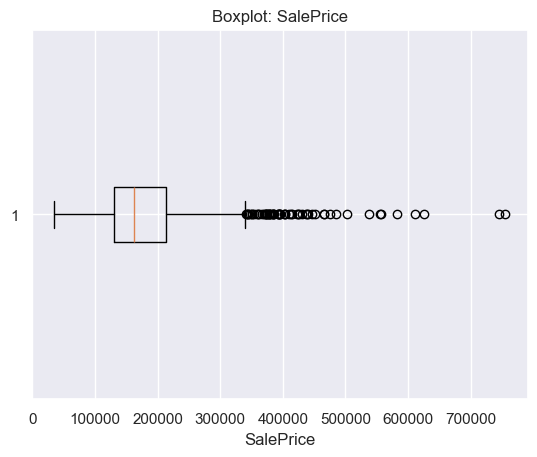

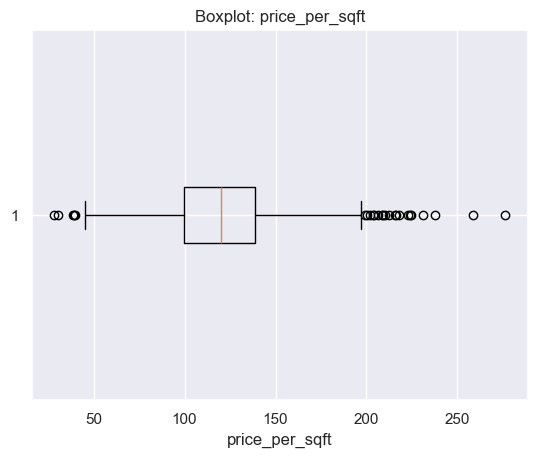

In [15]:
if "SalePrice" in df1.columns:
    plt.figure()
    plt.boxplot(df1["SalePrice"].dropna(), vert=False)
    plt.title("Boxplot: SalePrice")
    plt.xlabel("SalePrice")
    plt.show()

if "price_per_sqft" in df1.columns:
    plt.figure()
    plt.boxplot(df1["price_per_sqft"].dropna(), vert=False)
    plt.title("Boxplot: price_per_sqft")
    plt.xlabel("price_per_sqft")
    plt.show()


DISPERSIÓN : OverallQual vs SalePrice

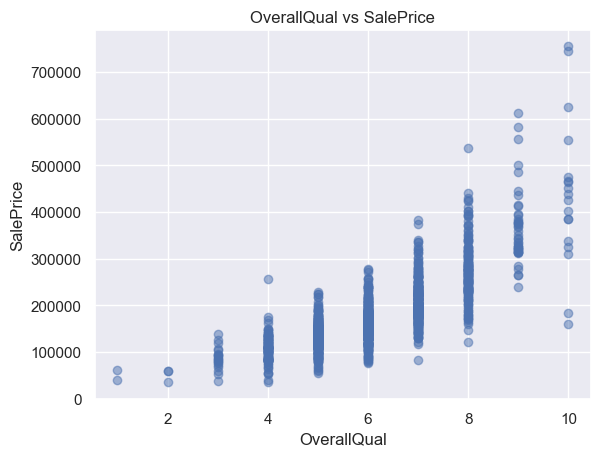

In [46]:
#OverallQual: la calidad general de la casa (1 = muy mala, 10 = excelente)
if "OverallQual" in df1.columns and "SalePrice" in df1.columns:
    plt.figure()
    plt.scatter(df1["OverallQual"], df1["SalePrice"], alpha=0.5)
    plt.title("OverallQual vs SalePrice")
    plt.xlabel("OverallQual")
    plt.ylabel("SalePrice")
    plt.show()

BARRIOS: mediana de price_per_sqft (Top 10)


Top 10 barrios por mediana de price_per_sqft:
Neighborhood
NridgHt    157.957245
StoneBr    157.864524
Veenker    143.819334
Somerst    137.352058
Blmngtn    137.122417
CollgCr    134.515817
Timber     133.998170
Mitchel    132.912458
NoRidge    128.190843
Sawyer     120.766654
Name: price_per_sqft, dtype: float64


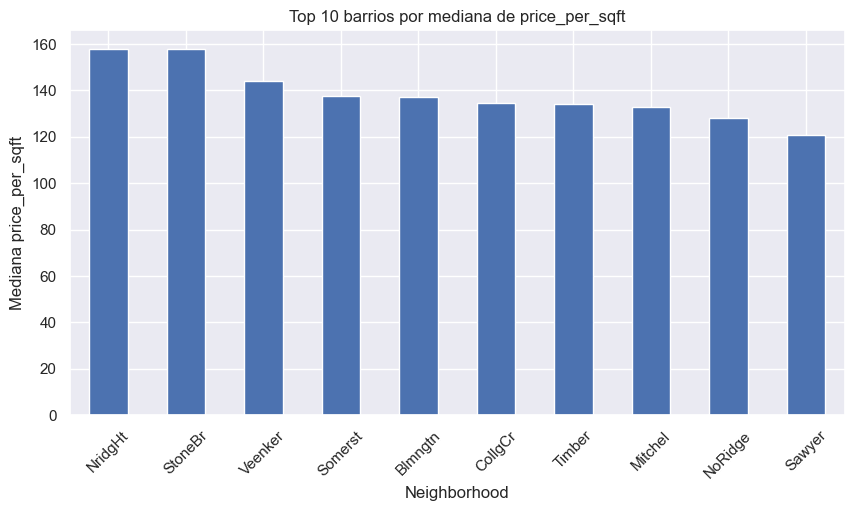

In [47]:
if "Neighborhood" in df1.columns and "price_per_sqft" in df1.columns:
    mediana_top10 = (df1[["Neighborhood", "price_per_sqft"]]
                     .dropna()
                     .groupby("Neighborhood")["price_per_sqft"]
                     .median()
                     .sort_values(ascending=False)
                     .head(10))
    print("\nTop 10 barrios por mediana de price_per_sqft:")
    print(mediana_top10)

    plt.figure(figsize=(10,5))
    mediana_top10.plot(kind="bar")
    plt.title("Top 10 barrios por mediana de price_per_sqft")
    plt.xlabel("Neighborhood")
    plt.ylabel("Mediana price_per_sqft")
    plt.xticks(rotation=45)
    plt.show()

MINI-REPORTE IMPRESO